<a href="https://colab.research.google.com/github/a-b-c-d-ritik/Google-colab/blob/main/first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [ ]:
df.shape

(100, 4)

0) preprocess + EDA + Feature selection
1)Extract input and output columns
2)Scale the values
3)Train test split
4)Train the model
5)Evaluate the model / model selection
6)Deploy the model


In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


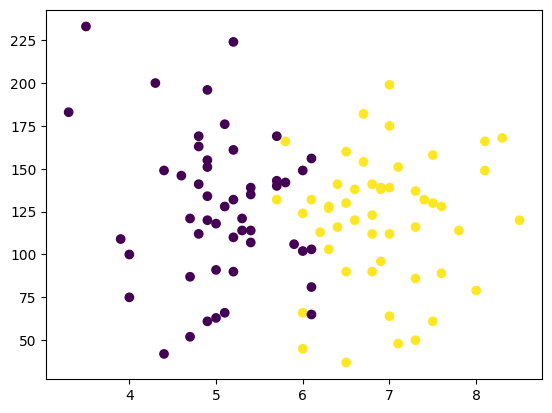

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'] )

In [ ]:
 from sklearn.linear_model import LinearRegression
 lr=LinearRegression()

In [ ]:
#splitting the columns0,1],2
x=df.iloc[:,0:2] #0,1 in x
y=df.iloc[:,-1] #-1 or 3 for last column


In [ ]:
x # independent variables

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y # dependent variables


,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
x_train

,cgpa,iq
43,6.8,141.0
39,4.6,146.0
47,5.2,161.0
94,4.7,52.0
98,6.3,103.0
...,...,...
52,7.0,175.0
10,6.0,45.0
46,5.3,114.0
90,7.3,86.0


In [ ]:
x_test

,cgpa,iq
76,4.9,155.0
59,4.8,112.0
15,5.1,176.0
65,8.1,166.0
25,5.0,91.0
72,7.3,116.0
53,8.3,168.0
48,6.6,138.0
42,7.6,89.0
31,3.9,109.0


In [ ]:
y_train

,placement
43,1
39,0
47,0
94,0
98,1
...,...
52,1
10,1
46,0
90,1


In [ ]:
y_test

,placement
76,0
59,0
15,0
65,1
25,0
72,1
53,1
48,1
42,1
31,0


In [ ]:
#scaling -Convert ya change data b/w small scale pionts like +,- 1,2,...
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [ ]:
x_train=scaler.fit_transform(x_train)
x_train

array([[ 0.76188575,  0.45340773],
       [-1.26299182,  0.57691468],
       [-0.71075248,  0.94743552],
       [-1.17095193, -1.74501594],
       [ 0.3016863 , -0.48524507],
       [-1.53911148,  1.91078971],
       [ 1.2220852 ,  0.35460217],
       [-0.25055303,  0.23109522],
       [-0.25055303,  0.42870634],
       [ 0.76188575,  0.00878272],
       [-0.5266727 , -0.21352979],
       [ 0.11760653, -1.42389788],
       [ 0.94596553, -1.44859927],
       [-1.17095193, -0.88046731],
       [ 0.02556664, -0.50994646],
       [ 0.57780597, -0.06532145],
       [-1.81523115, -1.17688398],
       [-0.71075248, -0.31233535],
       [ 2.32656387, -0.06532145],
       [ 1.31412509,  0.23109522],
       [-0.5266727 , -0.38643952],
       [ 0.02556664,  0.03348411],
       [-0.15851314,  0.47810912],
       [ 0.3016863 ,  0.13228966],
       [-0.25055303,  0.50281051],
       [-0.61871259, -0.04062006],
       [ 0.85392564,  0.37930356],
       [ 0.20964641, -0.23823118],
       [ 1.40616498,

In [ ]:
x_test=scaler.transform(x_test)
x_test

array([[-0.98687215,  0.79922718],
       [-1.07891204, -0.26293257],
       [-0.80279237,  1.31795636],
       [ 1.95840431,  1.07094247],
       [-0.89483226, -0.78166175],
       [ 1.2220852 , -0.16412701],
       [ 2.14248409,  1.12034524],
       [ 0.57780597,  0.37930356],
       [ 1.49820487, -0.83106453],
       [-1.90727104, -0.33703674]])

In [ ]:
lr.fit(x_train,y_train)#model train

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([ 0.10610988,  0.05848407,  0.18597943,  1.30711226,  0.12841443,
        0.99568008,  1.38248551,  0.73873648,  1.10164053, -0.27927567])

In [ ]:
y_test

,placement
76,0
59,0
15,0
65,1
25,0
72,1
53,1
48,1
42,1
31,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test.values,y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

<Axes: >

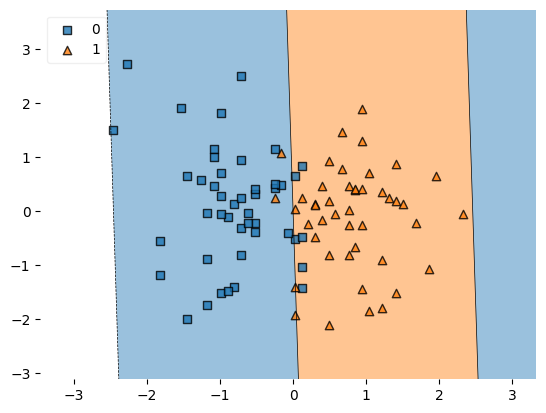

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=lr,legend=2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))